In [1]:
import os

pre_processed_path = os.path.join('..', 'data', 'csvs', "pre_processed.csv")
pre_normalized_path = os.path.join('..', 'data', 'csvs', "pre_normalized.csv")

In [3]:
from preprocess import stopwords
from sklearn.feature_extraction.text import CountVectorizer

bag_of_words = CountVectorizer(strip_accents="ascii", lowercase=True, stop_words = stopwords)

In [2]:
import pandas as pd

pre_processed_df = pd.read_csv(pre_processed_path)
pre_normalized_df = pd.read_csv(pre_normalized_path)

X_pre_pro = pre_processed_df['text']
y_pre_pro= pre_processed_df['label']

X_pre_norm= pre_normalized_df['text']
y_pre_norm = pre_normalized_df['label']

data = [(X_pre_pro, y_pre_pro), (X_pre_norm, y_pre_norm)]
data_names = ["pre_processed", "pre_normalized"]

In [8]:
from sklearn.tree import DecisionTreeClassifier

dtc_pre_pro = DecisionTreeClassifier(min_impurity_decrease=0.003, min_samples_leaf=5, random_state=42)
dtc_pre_norm = DecisionTreeClassifier(min_impurity_decrease=0.0005, max_depth=6, min_samples_leaf=5, random_state=42)

models = [dtc_pre_pro, dtc_pre_norm]

In [9]:
feature_names = []

for i, (X, y) in enumerate(data):
    X = bag_of_words.fit_transform(X).toarray()
    feature_names.append(bag_of_words.get_feature_names_out())
    print("Training model for", data_names[i])
    models[i].fit(X, y)

Training model for pre_processed
Training model for pre_normalized


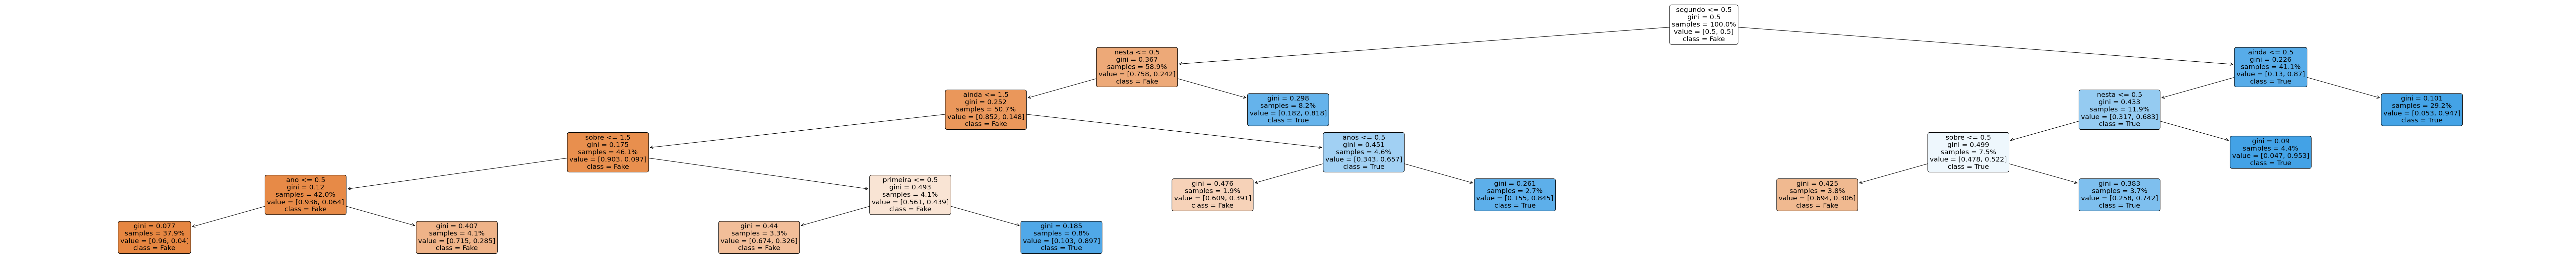

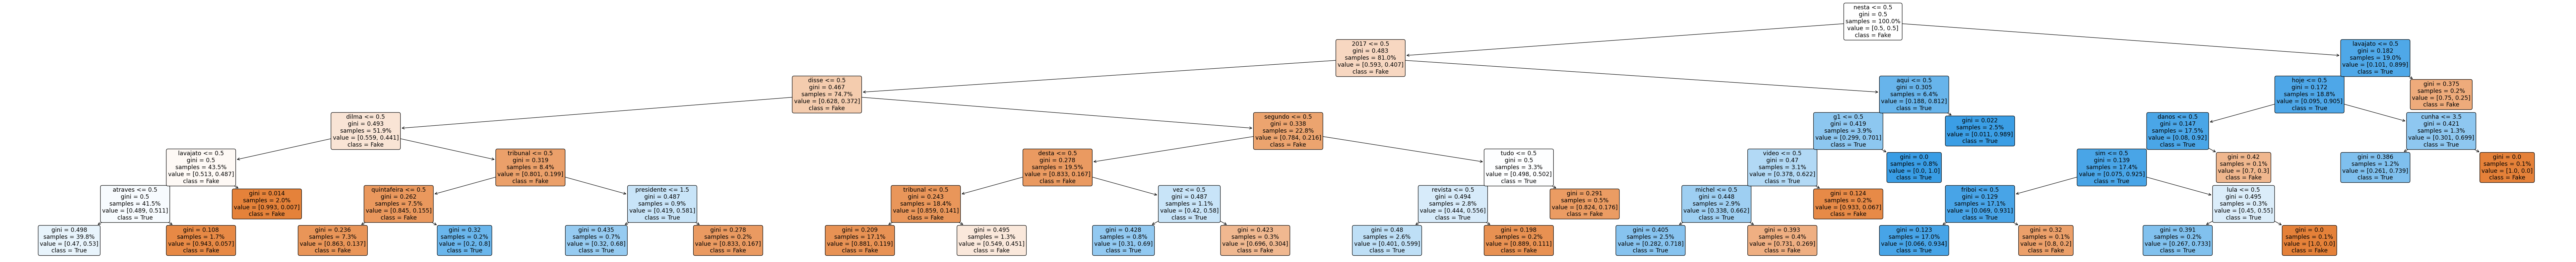

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


for i, model in enumerate(models):
    plt.figure(figsize=(100,10))
    plot_tree(model, class_names=["Fake", "True"], feature_names=feature_names[i], filled=True, rounded=True, proportion=True)
    plt.savefig('tree_'+data_names[i]+'.pdf', format='pdf', dpi=500)